In [182]:
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
import re

In [196]:
data1 = pd.read_csv("C:\\Users\\oliah\\Desktop\podaci_H_VV.csv",  low_memory=False)
size, numAttributes = data1.shape
size, numAttributes

(78466, 31)

In [197]:
data1.head()

,Unnamed: 0,Unnamed: 0.1,DateTime,T,Po,P,Pa,U,DD,Ff,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E.,sss
0,0,78465,2012-09-26 08:00,21.0,1001.9,1013.9,60.0,3,Wind blowing from the west-southwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,78464,2012-09-26 09:00,24.0,1002.1,1013.9,50.0,4,Wind blowing from the south-southwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,78463,2012-09-26 10:00,26.0,1002.2,1013.9,39.0,4,Wind blowing from the south-southwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,78462,2012-09-26 11:00,28.0,1002.3,1013.9,35.0,3,Wind blowing from the south-west,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,78461,2012-09-26 12:00,29.0,1002.3,1013.9,33.0,4,Wind blowing from the south,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [198]:
Nh_str = data1["Nh"].astype(str)

In [199]:
for (index, d) in enumerate(Nh_str):
    if d == "no clouds":
        data1.iloc[index, 18] = 0
        continue
    
    if d == "40%.":
        data1.iloc[index, 18] = 40
        continue
        
    if d == '20ñ30%.':
        data1.iloc[index, 18] = 25
        continue
    
    if d == "60%.":
        data1.iloc[index, 18] = 60
        continue
        
    if d == '70 ñ 80%.':
        data1.iloc[index, 18] = 75
        continue
        
    if d == '90  or more, but not 100%':
        data1.iloc[index, 18] = 95
        continue
            
    if d == '50%.':
        data1.iloc[index, 18] = 50
        continue
        
    if d == '100%.':
        data1.iloc[index, 18] = 100
        continue
        
    if d == '10%  or less, but not 0':
        data1.iloc[index, 18] = 5
        continue
        
    if d == 'Sky obscured by fog and/or other meteorological phenomena.':
        #print( data1["N"][index])
        data1.iloc[index, 18] = 100
        continue
        
    if d == 'nan':
        newD = data1["N"][index]
        if newD == "No Significant Clouds":
            data1.iloc[index, 18] = 0
            continue
        
        regex = '(\d\d)-(\d\d)'

        h = re.search(regex, newD)
        
        
        if h:
            data1.iloc[index, 18] = int(h.group(1)) + (int(h.group(2)) - int(h.group(1))) / 2
        else:
            if newD == "no clouds" or newD == "No clouds":
                data1.iloc[index, 18] = 0
                continue
            
            if re.search('100%', newD) or re.search('Sky obscured by fog and/or other meteorological phenomena.', newD):
                data1.iloc[index, 18] = 100
                continue
            
            if re.search('Vertical visibility 30 m', newD):
                data1.iloc[index, 18] = 90
                continue
                
            if re.search('Vertical visibility 60 m', newD):
                data1.iloc[index, 18] = 70
                continue
            
            if re.search('Vertical visibility 90 m', newD):
                data1.iloc[index, 18] = 70
                continue
   
            if re.search('90  or more, but not 100%', newD):
                data1.iloc[index, 18] = 90
                continue
                
            if re.search('10%  or less, but not 0', newD):
                data1.iloc[index, 18] = 10
                continue
            
            if newD == '40%.':
                data1.iloc[index, 18] = 40
                continue
            
            if re.search('20ñ30%.', newD):
                data1.iloc[index, 18] = 25
                continue

In [200]:
data1.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
DateTime            0
T                   0
Po                  0
P                   0
Pa              23095
U                   0
DD                  0
Ff              36774
ff10            71281
ff3             78131
N                   0
WW                  0
W1              33082
W2              69936
Tn              76255
Tx              76249
Cl                  0
Nh              46622
H               53192
Cm              48357
Ch              51123
VV              41399
Td              36860
RRR             74517
tR              74517
E               76372
Tg              76394
E.              78350
sss                 0
dtype: int64

In [201]:
for x in ['WW', 'W1', 'W2', 'Cl', 'tR', 'Tg', 'E', 'E.']:
    del data1[x]
    
del data1['ff10']
del data1['ff3']   # malo vrednosti, isto kao ff


del data1['Pa']   # ne secam se sta je

del data1['Nh']   # iskoristili N umesto ovoga


del data1['Tn']  # malo vrednsti isto kao T
del data1['Tx']  # 
del data1['Td']  # 

del data1['RRR'] # kolko kise malo vrednosti

del data1['Cm'] # na latinskom, moze u kategoricke zajedno sa Cl i Ch, potencijalno ukljuci za oblake
del data1['Ch']

del data1['Po'] # potpuno korelisani




del data1['Unnamed: 0']
del data1['Unnamed: 0.1']

In [202]:
data1.isna().sum()

DateTime        0
T               0
P               0
U               0
DD              0
Ff          36774
N               0
H           53192
VV          41399
sss             0
dtype: int64

In [203]:
dataCorr = data1.corr(method='pearson')
dataCorr

,T,P,U,Ff,H,VV,sss
T,1.000000,0.024375,-0.184513,-0.005725,0.370655,0.566745,-0.046685
P,0.024375,1.000000,-0.096210,-0.078484,0.034581,-0.004675,-0.017467
U,-0.184513,-0.096210,1.000000,-0.187146,-0.532653,-0.642369,0.037606
Ff,-0.005725,-0.078484,-0.187146,1.000000,-0.028708,0.219948,-0.006179
H,0.370655,0.034581,-0.532653,-0.028708,1.000000,0.472814,-0.025322
VV,0.566745,-0.004675,-0.642369,0.219948,0.472814,1.000000,-0.044888
sss,-0.046685,-0.017467,0.037606,-0.006179,-0.025322,-0.044888,1.000000


<AxesSubplot:>

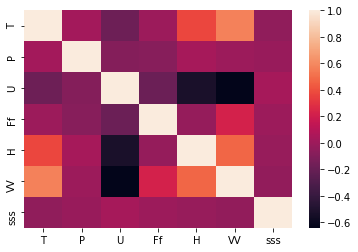

In [204]:
sb.heatmap(dataCorr)

In [206]:
data1.to_csv("podaci_brisanje_i_sredjivanje_N.csv")